In [41]:
%load_ext cython
import timeit 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [42]:
%%cython

def subset_sum_cy(numbers, target, partial_list=[], local=False):
    '''
    https://stackoverflow.com/questions/4632322/   finding-all-possible-combinations-of-numbers-to-reach-a-given-sum
    '''

    cdef:
        double s, n
        int i


    s = sum(partial_list)

    # check if the partial_list sum is equals to target
    if s == target: 
        msg = "sum(%s)=%s" % (partial_list, target)
        #print(msg)
        return 0

    if s > target:
        return 0

    for i in range(len(numbers)):
        n = numbers[i]
        remaining = numbers[i+1:]
        subset_sum_cy(remaining, target, partial_list + [n]) 

In [43]:
def subset_sum_py(numbers, target, partial_list=[], local=False):
    '''
    https://stackoverflow.com/questions/4632322/   finding-all-possible-combinations-of-numbers-to-reach-a-given-sum
    '''

    s = sum(partial_list)

    # check if the partial_list sum is equals to target
    if s == target: 
        msg = "sum(%s)=%s" % (partial_list, target)
        #print(msg)
        return 0

    if s > target:
        return 0

    for i in range(len(numbers)):
        n = numbers[i]
        remaining = numbers[i+1:]
        subset_sum_py(remaining, target, partial_list + [n]) 

In [44]:
num_list = [7,8,3,1,2,4,5,10, 12]
answer = 13

In [45]:
times_cy = %timeit -o subset_sum_cy(num_list, answer)

88.1 µs ± 9.46 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [46]:
time_py = %timeit -o  subset_sum_py(num_list, answer)

125 µs ± 13.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [67]:
time_df = pd.DataFrame({'Cython': times_cy.timings,
            'Pure python': time_py.timings})\
    .pipe(pd.melt) \
    .assign(value = lambda d: d.value.astype(float) * 1e6)
time_df.head()

,variable,value
0,Cython,79.686779
1,Cython,88.386141
2,Cython,80.673665
3,Cython,82.301678
4,Cython,85.197209


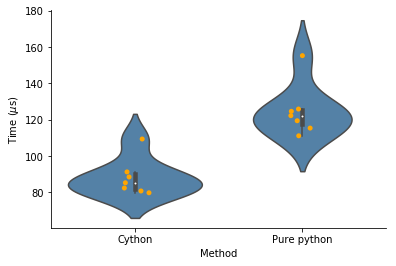

In [69]:
ax = plt.subplot(111)
sns.violinplot(data=time_df, 
            x = 'variable', 
            y='value', 
            color='steelblue', 
            alpha=0.2, ax = ax)
sns.stripplot(data=time_df, 
            x= 'variable', 
            y = 'value', 
            color = 'orange', ax=ax)
sns.despine()
ax.set_xlabel('Method')
ax.set_ylabel('Time ($\mu$s)')
plt.savefig('timing.png')